In [1]:
import wandb

api = wandb.Api()
run = api.run("erlandpg/ml710/qi5s2jqy")
run

<Run erlandpg/ml710/qi5s2jqy (finished)>

Initializing W&B API...
API initialized.
Searching for runs in project: erlandpg/ml710_FINALFINALFINALFINALproject
Plotting metric: 'statistical_efficiency' for run names: ['Microllama-fineweb-edu-base-dp_BUCKET-528.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)', 'Microllama-fineweb-edu-base-dp_BUCKET-544.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)', 'Microllama-fineweb-edu-base-dp_BUCKET-544.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)', 'Microllama-fineweb-edu-base-dp_BUCKET-576.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)', 'Microllama-fineweb-edu-base-dp_BUCKET-640.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)']

Searching for run with name: 'Microllama-fineweb-edu-base-dp_BUCKET-528.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)'...

Searching for run with name: 'Microllama-fineweb-edu-base-dp_BUCKET-544.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)'...

Searching for run with name: 'Microllama-fineweb-edu-base-dp_BUCKET-544.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)'...

Searching for run with name: 'Microllama-fineweb-edu-base-dp_BUCKET-576.00-TP(1)-CP(1)-PP(

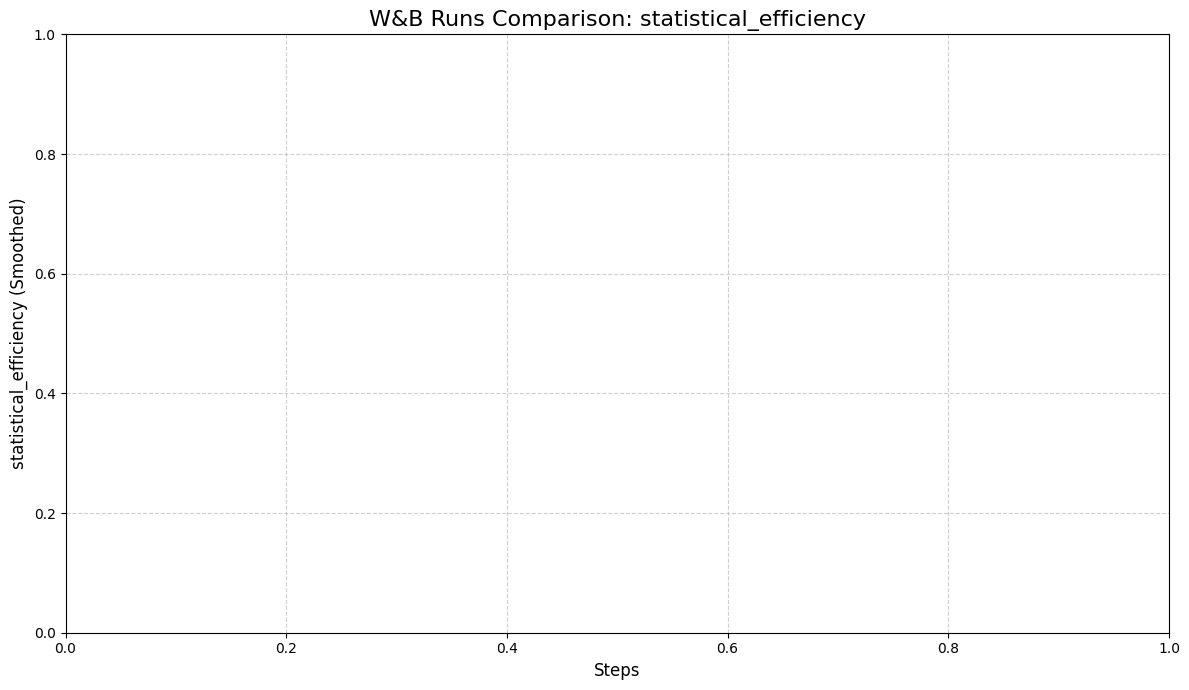

In [10]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Configuration ---

# !! Replace with your W&B entity (username or team name) !!
# --- Configuration ---

# !! Replace with your W&B entity (username or team name) !!
ENTITY = "erlandpg" # e.g., "my_username" or "my_team"

# !! Replace with your W&B project name !!
PROJECT = "ml710_FINALFINALFINALFINALproject" # e.g., "my_image_classification_project"

# !! Replace with the NAMES of the runs you want to plot !!
# These are the names shown in the W&B UI (e.g., 'gentle-sun-42', 'my-training-run-1')
RUN_NAMES = [
    "Microllama-fineweb-edu-base-dp_BUCKET-528.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)", # e.g., "bert-fine-tune-attempt-5"
    "Microllama-fineweb-edu-base-dp_BUCKET-544.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)", # e.g., "baseline-cnn"
    "Microllama-fineweb-edu-base-dp_BUCKET-544.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)", # e.g., "baseline-cnn"
    "Microllama-fineweb-edu-base-dp_BUCKET-576.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)",
    "Microllama-fineweb-edu-base-dp_BUCKET-640.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)"
    # Add more run names as needed
]

# !! Replace with the metric you want to plot !!
METRIC_KEY = "statistical_efficiency" # e.g., "epoch/loss"

# --- Smoothing ---
SMOOTHING_FACTOR = 0.6 # Adjust as needed (0 = no smoothing, closer to 1 = more smoothing)

# --- Plot Customization ---
PLOT_TITLE = f"W&B Runs Comparison: {METRIC_KEY}"
X_AXIS_LABEL = "Steps"
Y_AXIS_LABEL = f"{METRIC_KEY} (Smoothed)"
PLOT_GRID = True

# --- Function to apply EMA smoothing ---
def smooth_ema(series, factor):
    """Applies Exponential Moving Average smoothing."""
    if factor <= 0 or factor >= 1:
        return series
    return series.ewm(alpha=1 - factor, adjust=True).mean()

# --- Main Plotting Function ---
def plot_wandb_runs_by_name(entity, project, run_names, metric_key, smoothing_factor=0.0,
                            title="W&B Run Comparison", xlabel="Steps", ylabel=None, grid=True):
    """
    Fetches data for W&B runs identified by their names and plots a specified metric.

    Args:
        entity (str): Your W&B entity (username or team name).
        project (str): Your W&B project name.
        run_names (list): List of W&B run names to search for and plot.
        metric_key (str): The metric key to plot from W&B history.
        smoothing_factor (float, optional): EMA smoothing factor (0 to <1). Defaults to 0.
        title (str, optional): Plot title.
        xlabel (str, optional): X-axis label.
        ylabel (str, optional): Y-axis label. Defaults to metric_key.
        grid (bool, optional): Whether to display a grid. Defaults to True.
    """
    if not entity or not project:
        raise ValueError("W&B entity and project must be specified.")

    if ylabel is None:
        ylabel = f"{metric_key}{f' (Smoothed {smoothing_factor:.1f})' if smoothing_factor > 0 else ''}"

    print("Initializing W&B API...")
    api = wandb.Api(timeout=19) # Increase timeout for potentially longer searches
    print("API initialized.")

    plt.figure(figsize=(12, 7))

    full_project_path = f"{entity}/{project}"
    print(f"Searching for runs in project: {full_project_path}")
    print(f"Plotting metric: '{metric_key}' for run names: {run_names}")

    for run_name_to_find in run_names:
        print(f"\nSearching for run with name: '{run_name_to_find}'...")

        try:
            # *** Use api.runs with a filter to find the run by name ***
            # Note: "display_name" is typically the filter key for the name shown in the UI.
            runs_found = api.runs(full_project_path, filters={"display_name": run_name_to_find})

            if len(runs_found) == 0:
                print(f"  WARNING: No run found with the name '{run_name_to_find}' in project '{full_project_path}'. Skipping.")
                continue
            elif len(runs_found) > 1:
                # Handle cases where the name is not unique (optional: could plot all, but safer to warn)
                run_ids = [r.id for r in runs_found]
                print(f"  WARNING: Found multiple runs ({len(runs_found)}) with the name '{run_name_to_find}': IDs {run_ids}. Skipping this name as it's ambiguous.")
                # If you *wanted* to plot all runs with the same name, you'd loop through 'runs_found' here.
                continue

            # --- Found exactly one run ---
            run = runs_found[0] # Get the single run object from the list
            run_name_for_plot = run.name # Get the actual name for the legend (might differ slightly if generated)
            print(f"  Run found: '{run_name_for_plot}' (ID: {run.id})")


            # Get history - specify the metric key and the default x-axis '_step'
            history = run.history(keys=[metric_key, '_step'], pandas=True)
            print(f"  History fetched. Shape: {history.shape}")

            # Drop rows where the metric or step is NaN
            history = history.dropna(subset=[metric_key, '_step'])

            if history.empty:
                print(f"  WARNING: No valid data points found for metric '{metric_key}' in run {run.id}. Skipping.")
                continue

            # Extract data
            x_values = history['_step']
            y_values = history[metric_key]

            # Apply smoothing
            if smoothing_factor > 0:
                y_values_smoothed = smooth_ema(y_values, smoothing_factor)
                print(f"  Applied EMA smoothing with factor {smoothing_factor}")
            else:
                y_values_smoothed = y_values
                print("  No smoothing applied.")

            # Plot using the fetched run name as the label
            plt.plot(x_values, y_values_smoothed, label=run_name_for_plot, linewidth=2)
            print(f"  Plotted data for '{run_name_for_plot}'.")

        except wandb.errors.CommError as e:
            print(f"  ERROR: Could not query runs for project '{full_project_path}'. Check entity/project name and permissions. Details: {e}")
        except KeyError as e:
            print(f"  ERROR: Metric key '{metric_key}' or '_step' not found in run '{run.id}'. Check metric names. Details: {e}")
        except Exception as e:
            print(f"  ERROR: An unexpected error occurred while processing run name '{run_name_to_find}'. Details: {e}")

    # --- Final Plot Formatting ---
    print("\nFinalizing plot...")
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    if plt.gca().has_data():
        plt.legend(fontsize=10)
    else:
        print("WARNING: No data was plotted. Cannot display legend.")

    if grid:
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    print("Displaying plot.")
    plt.show()

# Make sure you have updated ENTITY, PROJECT, RUN_NAMES, and METRIC_KEY above!
if not ENTITY or ENTITY == "your_entity" or not PROJECT or PROJECT == "your_project":
        print("\n" + "="*30 + " WARNING " + "="*30)
        print("Please update the ENTITY and PROJECT variables with your actual W&B details.")
        print("="*70 + "\n")
elif not RUN_NAMES or RUN_NAMES[0] == "run_name_1":
    print("\n" + "="*30 + " WARNING " + "="*30)
    print("Please update the RUN_NAMES list with the actual names of the W&B runs you want to plot.")
    print("="*70 + "\n")
elif METRIC_KEY == "your_metric_key":
    print("\n" + "="*30 + " WARNING " + "="*30)
    print("Please update the METRIC_KEY with the actual metric you want to plot.")
    print("="*70 + "\n")
else:
    plot_wandb_runs_by_name(
        entity=ENTITY,
        project=PROJECT,
        run_names=RUN_NAMES,
        metric_key=METRIC_KEY,
        smoothing_factor=SMOOTHING_FACTOR,
        title=PLOT_TITLE,
        xlabel=X_AXIS_LABEL,
        ylabel=Y_AXIS_LABEL,
        grid=PLOT_GRID
    )

In [ ]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Configuration ---

# === CHOOSE ONE METHOD ===

# METHOD 1: Identify runs by specific path (entity/project/run_id)
# Fill this list if using Method 1. Leave ENTITY/PROJECT/RUN_NAMES as None or empty.
ENTITY = "erlandpg"       # Your W&B entity (username or team name)
PROJECT = "ml710_FINALFINALFINALFINALproject"     # Your W&B project name
RUN_PATHS = [
    "ll9v3d15",
    "2cltph5u",
    "uaa4v0j1",
    "ta505fjg",
    "oj93ibcj"

]

RUN_PATHS = [f"{ENTITY}/{PROJECT}/{run_id}" for run_id in RUN_PATHS]

Initializing W&B API...
API initialized.
Plotting 5 runs identified by path...

Fetching run path: erlandpg/ml710_FINALFINALFINALFINALproject/ll9v3d15
  Processing run: 'Microllama-fineweb-edu-base-dp_WAIT_FREE-514.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)' (ID: ll9v3d15) -> Plot Label: 'BS-1'
    History fetched. Shape: (500, 2)
    Plotted data.

Fetching run path: erlandpg/ml710_FINALFINALFINALFINALproject/2cltph5u
  Processing run: 'Microllama-fineweb-edu-base-dp_WAIT_FREE-528.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)' (ID: 2cltph5u) -> Plot Label: 'BS-8'
    History fetched. Shape: (500, 2)
    Plotted data.

Fetching run path: erlandpg/ml710_FINALFINALFINALFINALproject/uaa4v0j1
  Processing run: 'Microllama-fineweb-edu-base-dp_WAIT_FREE-544.00-TP(1)-CP(1)-PP(1)-DP(2)-Rank(0)' (ID: uaa4v0j1) -> Plot Label: 'BS-16'
    History fetched. Shape: (500, 2)
    Plotted data.

Fetching run path: erlandpg/ml710_FINALFINALFINALFINALproject/ta505fjg
  Processing run: 'Microllama-fineweb-edu-base-dp_WAIT_F

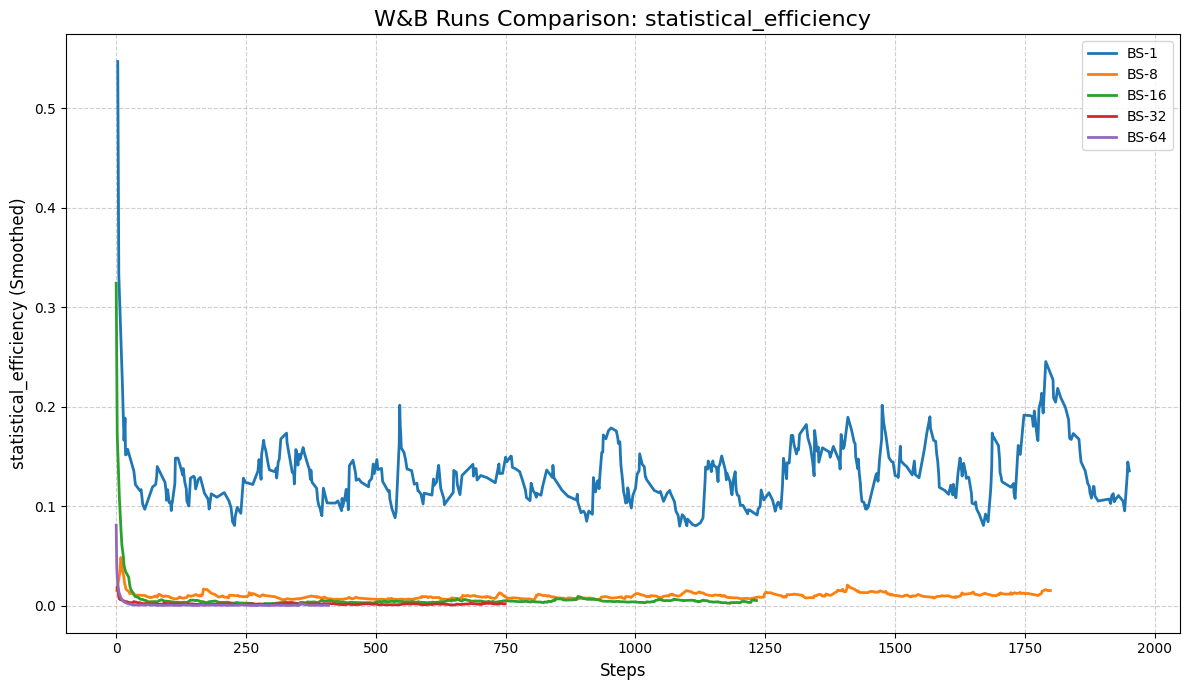